# Import Library

In [1]:
import pickle
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Load Dataset

In [2]:
df = pd.read_csv("./data/data_cleaned.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0,0,1,3,0,0.679023,0.212996,2,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1


# Feature and Target Separation

In [3]:
X = df.drop("stroke",axis=1)
y = df['stroke']

# Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Model Random Forest Without Imbalance Dataset

Training Model Random Forest

In [5]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for Random Forest: {accuracy_rf:.4f}")

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Accuracy for Random Forest: 0.9374
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



Distribution of Classes

stroke
0    3900
1     187
Name: count, dtype: int64


C:\Users\Dicky Zulfikar\AppData\Local\Temp\ipykernel_7852\2732961233.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


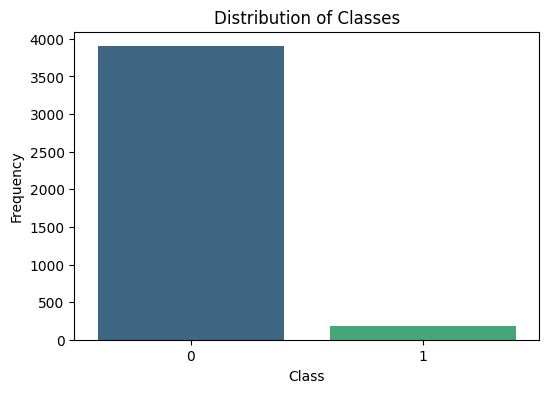

In [6]:
class_counts = y_train.value_counts()
print(class_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Training Model Random Forest With Imbalance Dataset

Imbalance Dataset

In [7]:
ros = RandomOverSampler(random_state=42)
X_ovsampled, y_ovsampled = ros.fit_resample(X, y)

Training Model with Imbalance Dataset

In [8]:
rf_model = RandomForestClassifier()
rf_model.fit(X_ovsampled, y_ovsampled)
y_pred_rf = rf_model.predict(X_ovsampled)

accuracy_rf = accuracy_score(y_ovsampled, y_pred_rf)
print(f"Accuracy for Random Forest: {accuracy_rf:.4f}")

print("Classification Report for Random Forest with Random Over Sampling:")
print(classification_report(y_ovsampled, y_pred_rf))

Accuracy for Random Forest: 1.0000
Classification Report for Random Forest with Random Over Sampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4860
           1       1.00      1.00      1.00      4860

    accuracy                           1.00      9720
   macro avg       1.00      1.00      1.00      9720
weighted avg       1.00      1.00      1.00      9720



Distribution of Class

stroke
1    4860
0    4860
Name: count, dtype: int64


C:\Users\Dicky Zulfikar\AppData\Local\Temp\ipykernel_7852\1547032931.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


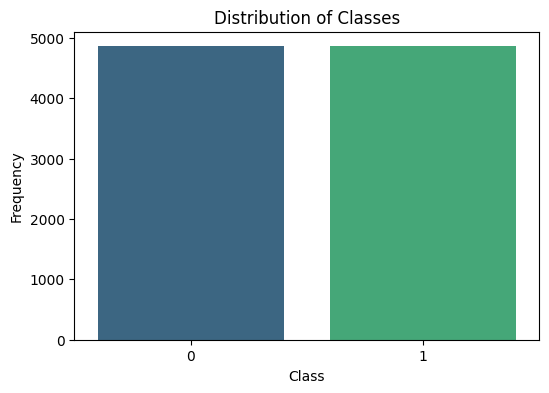

In [9]:
class_counts = y_ovsampled.value_counts()
print(class_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Confusion Matrix

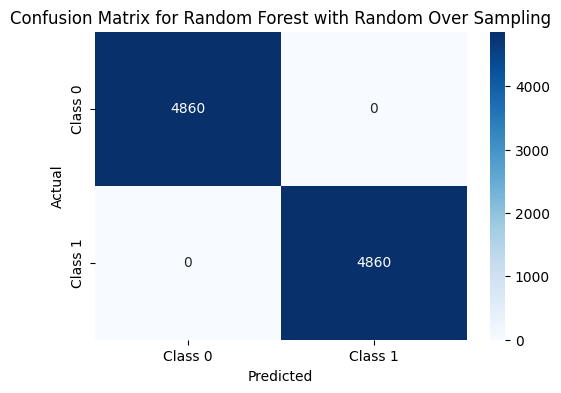

In [10]:
conf_matrix = confusion_matrix(y_ovsampled, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Random Forest with Random Over Sampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save Model 

In [11]:
with open('models/rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)